# House Pricing with Regression Models

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
house_price=pd.read_csv('D:/Python/機器學習HW/期末/house_price.csv')

# Data Pre-processing and Cleansing

In [3]:
num_cols=house_price.columns[house_price.dtypes!= "object"]
cat_cols=house_price.columns[house_price.dtypes== "object"]

In [4]:
house_price[num_cols].isnull().sum().sort_values(ascending=False)/len(house_price[num_cols])

LotFrontage      0.177397
GarageYrBlt      0.055479
MasVnrArea       0.005479
Id               0.000000
OpenPorchSF      0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
EnclosedPorch    0.000000
HalfBath         0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
BedroomAbvGr     0.000000
FullBath         0.000000
MSSubClass       0.000000
BsmtFinSF2       0.000000
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
BsmtFinSF1       0.000000
BsmtUnfSF        0.000000
BsmtHalfBath     0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
SalePrice        0.000000
dtype: float

In [5]:
house_price[cat_cols].isnull().sum().sort_values(ascending=False)/len(house_price[cat_cols])

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
GarageType       0.055479
GarageCond       0.055479
GarageQual       0.055479
GarageFinish     0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtQual         0.025342
BsmtCond         0.025342
MasVnrType       0.005479
Electrical       0.000685
Functional       0.000000
KitchenQual      0.000000
CentralAir       0.000000
HeatingQC        0.000000
Heating          0.000000
PavedDrive       0.000000
SaleType         0.000000
MSZoning         0.000000
Street           0.000000
Condition2       0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
BldgType         0.000000
Foundation       0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st 

In [6]:
house_price.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","Id"],axis=1, inplace=True)

In [7]:
house_price

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in house_price.columns:
    if house_price[i].dtypes== "object":        
        house_price[i]=label_encoder.fit_transform(house_price[i])

In [9]:
for i in house_price.columns:
    if house_price[i].isnull().sum() != 0:
        house_price[i].fillna(house_price[i].mean(), inplace=True)

In [10]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Feature Engineering methods

<Axes: >

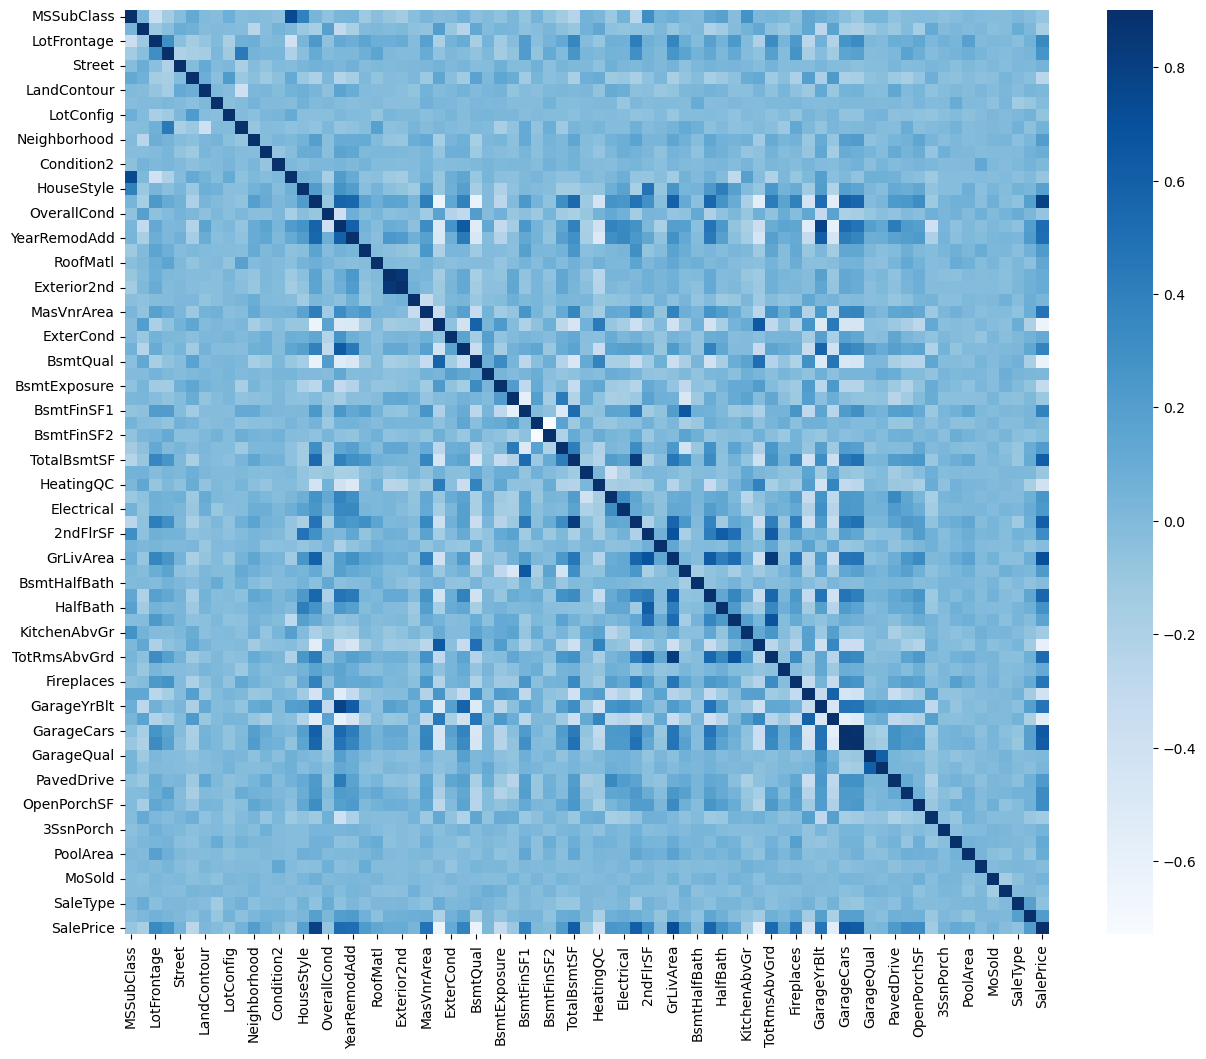

In [11]:
corr = house_price.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [12]:
x=house_price.drop('SalePrice', axis=1)
y=house_price['SalePrice']
x.shape,y.shape

((1460, 74), (1460,))

In [13]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=100,n_estimators=100)

rfe_model = RFE(rfr, n_features_to_select = 15, step = 3)
rfe = rfe_model.fit(x, y)
rfe.support_

array([False, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [14]:
x.columns[rfe.support_] 

Index(['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')

In [15]:
from sklearn import svm
svr = svm.SVR(C=1,kernel="linear")

rfe_model = RFE(svr, n_features_to_select = 15, step = 3)
rfe = rfe_model.fit(x, y)
rfe.support_ 

array([False, False,  True, False, False,  True, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True])

In [16]:
x.columns[rfe.support_] 

Index(['LotFrontage', 'LotShape', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'BsmtQual', 'HeatingQC', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

In [17]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)

log_reg_model = SelectFromModel(log_reg).fit(x,y)
X_log_reg = log_reg_model.transform(x)
X_log_reg.shape

C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(1460, 16)

In [18]:
x.columns[log_reg_model.get_support()]

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'MiscVal',
       'YrSold'],
      dtype='object')

DecisionTreeRegressor(random_state=42) > feature importances : 
 [3.30224829e-04 8.89592011e-04 8.70557529e-03 5.99973869e-03
 3.02017626e-05 3.85535200e-04 2.23982449e-04 0.00000000e+00
 3.05334868e-04 1.37366320e-03 1.69345477e-02 2.18343879e-04
 1.68731932e-04 7.80226543e-06 1.78847444e-04 6.36223234e-01
 3.10752242e-03 4.73508570e-03 3.74866155e-03 2.51275930e-04
 0.00000000e+00 2.50585997e-03 8.17830476e-04 6.21659583e-03
 6.55462350e-04 2.64693336e-03 5.06188793e-04 2.47194479e-04
 5.20363156e-04 3.97413742e-05 1.96558272e-03 8.53698239e-04
 2.08976175e-02 1.45494408e-04 3.43480291e-04 9.06416465e-03
 2.94320770e-02 0.00000000e+00 2.39761082e-04 6.43727969e-03
 1.20959138e-05 2.33657953e-02 3.74610877e-02 0.00000000e+00
 1.00539913e-01 8.89778947e-04 7.38210301e-05 2.80711234e-03
 7.91762982e-04 2.26172937e-04 5.80289427e-03 1.52145361e-03
 2.05335175e-03 7.54358020e-04 1.36501661e-03 6.94794588e-03
 2.97685901e-03 2.49887356e-03 1.24712476e-02 1.12544929e-02
 2.08719429e-04 1.39

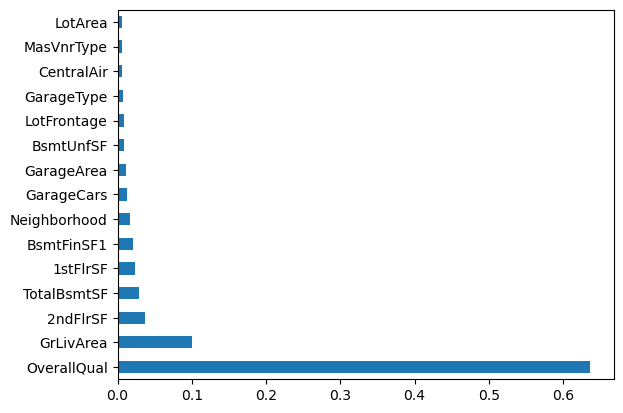

RandomForestRegressor(random_state=42) > feature importances : 
 [1.73775711e-03 2.29206155e-03 6.08006079e-03 1.30649022e-02
 5.30298804e-06 1.34593566e-03 2.18391442e-03 1.71248657e-08
 8.51510267e-04 4.64389848e-04 6.92970767e-03 6.52242348e-04
 4.59253801e-04 3.89494449e-04 6.29052859e-04 5.78929711e-01
 4.11208546e-03 8.24639745e-03 7.11446796e-03 7.93644991e-04
 2.44527699e-04 1.72169650e-03 1.35058534e-03 1.46693647e-03
 6.37434161e-03 1.80475865e-03 5.75229709e-04 5.20828298e-04
 4.03206650e-03 4.56549047e-04 2.19378237e-03 1.43679472e-03
 2.98657424e-02 2.89686510e-04 6.78515406e-04 4.62072683e-03
 3.63276678e-02 1.50465870e-04 6.31061292e-04 2.60080875e-03
 1.67498149e-04 2.43597623e-02 3.09990470e-02 1.04054559e-04
 1.10471288e-01 6.25710567e-04 3.68609437e-04 8.07804768e-03
 1.37182981e-03 1.64209179e-03 4.33056527e-04 3.95043016e-03
 7.25872925e-03 4.49715875e-04 3.63393311e-03 5.45280677e-03
 4.35600533e-03 5.74937114e-03 2.44823310e-02 1.34063615e-02
 1.30326275e-04 1.66

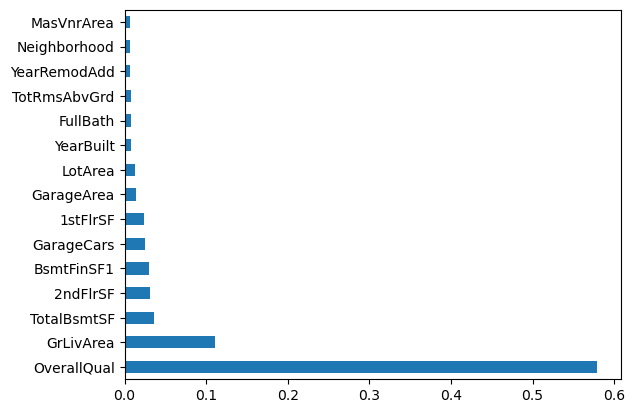

ExtraTreesRegressor(random_state=42) > feature importances : 
 [2.48913143e-03 4.13293679e-03 3.63733482e-03 8.54964592e-03
 8.24263474e-05 2.84718873e-03 3.31378081e-03 1.28934332e-05
 2.12447706e-03 3.05204561e-03 5.64611530e-03 1.33899879e-03
 5.67171554e-04 2.19861327e-03 1.65380837e-03 2.51100174e-01
 4.27629113e-03 2.28547770e-02 8.05721818e-03 2.25830875e-03
 8.54015166e-04 2.49153597e-03 3.07904728e-03 2.37454644e-03
 6.90489656e-03 7.85982384e-02 1.54324413e-03 1.28545338e-03
 4.77066784e-02 1.00508118e-03 3.66138473e-03 3.54732855e-03
 1.44572529e-02 6.28075265e-04 1.18236454e-03 2.91155488e-03
 2.06133517e-02 5.05550549e-04 1.44905748e-03 6.78724196e-03
 4.20341343e-04 1.69883946e-02 1.64740805e-02 3.31891328e-04
 7.98526382e-02 5.99050076e-03 2.59363301e-03 3.96252743e-02
 3.29162878e-03 6.77930165e-03 9.65765104e-04 5.04500167e-02
 1.01421056e-02 1.23755461e-03 2.03737097e-02 1.20166094e-02
 6.58403615e-03 1.79243438e-02 1.31387281e-01 1.71723744e-02
 7.60610815e-04 3.8884

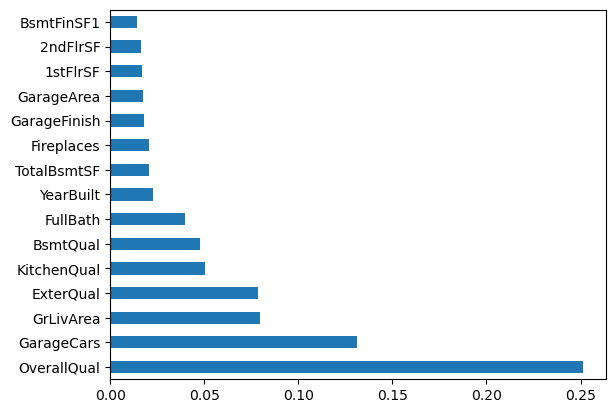

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import ExtraTreesRegressor

model = [DecisionTreeRegressor(random_state=42), 
         RandomForestRegressor(n_estimators=100,random_state=42),
         ExtraTreesRegressor(n_estimators=100,random_state=42)]

model = [model[i].fit(x,y) for i in range(len(model))]

for i in range(len(model)):
    print(str(model[i]) + ' > feature importances : \n', 
          model[i].feature_importances_) 
    feat_importances = pd.Series(model[i].feature_importances_, 
                                 index=x.columns)
    feat_importances.nlargest(15).plot.barh()
    plt.show()

In [20]:
x_features=x[['LotFrontage','LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt',
              'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
              '2ndFlrSF','GrLivArea', 'TotRmsAbvGrd','GarageArea','KitchenQual',
              'BsmtQual','FullBath','Neighborhood','GarageCars','Fireplaces']]
x_features

,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,KitchenQual,BsmtQual,FullBath,Neighborhood,GarageCars,Fireplaces
0,65.0,8450,5,7,2003,2003,706,150,856,856,854,1710,8,548,2,2,2,5,2,0
1,80.0,9600,24,6,1976,1976,978,284,1262,1262,0,1262,6,460,3,2,2,24,2,1
2,68.0,11250,5,7,2001,2002,486,434,920,920,866,1786,6,608,2,2,2,5,2,1
3,60.0,9550,6,7,1915,1970,216,540,756,961,756,1717,7,642,2,3,1,6,3,1
4,84.0,14260,15,8,2000,2000,655,490,1145,1145,1053,2198,9,836,2,2,2,15,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,8,6,1999,2000,0,953,953,953,694,1647,7,460,3,2,2,8,2,1
1456,85.0,13175,14,6,1978,1988,790,589,1542,2073,0,2073,7,500,3,2,2,14,2,2
1457,66.0,9042,6,7,1941,2006,275,877,1152,1188,1152,2340,9,252,2,3,2,6,1,2
1458,68.0,9717,12,5,1950,1996,49,0,1078,1078,0,1078,5,240,2,3,1,12,1,0


In [21]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
x_features = standard_scaler.fit_transform(x_features)

In [22]:
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train , y_test = train_test_split(x_features,y , test_size = .2 , random_state=42)

In [23]:
from sklearn.model_selection import GridSearchCV

# Polynomial Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('linear_regression', LinearRegression(fit_intercept=True))
])


param_grid = {'poly_features__degree':[1,2,3,4,5]}
grid_search1 = GridSearchCV(polynomial_regression, param_grid=param_grid, scoring='neg_mean_squared_error',cv=10)
grid_search1.fit(X_train,y_train)

grid_search2 = GridSearchCV(polynomial_regression, param_grid=param_grid, scoring="r2",cv=10)
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly_features',
                                        PolynomialFeatures(include_bias=False)),
                                       ('linear_regression',
                                        LinearRegression())]),
             param_grid={'poly_features__degree': [1, 2, 3, 4, 5]},
             scoring='r2')

In [25]:
best_params1 = grid_search1.best_params_
best_score1 = grid_search1.best_score_
best_params2 = grid_search2.best_params_
best_score2 = grid_search2.best_score_
print(best_params1)
print(np.sqrt(-best_score1))
print(best_params2)
print(best_score2)

{'poly_features__degree': 1}
36864.947621061074
{'poly_features__degree': 1}
0.7763474316345645


In [26]:
from sklearn.metrics import mean_squared_error,r2_score

best_model = grid_search1.best_estimator_
y_pred = best_model.predict(X_test)
lin_mse = mean_squared_error(y_test,y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
lin_r2=r2_score(y_test,y_pred)
print(lin_r2)

36710.483624412875
0.8243021780904802


# KNeighborRegressor

In [27]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()

param_grid = {'n_neighbors':[5,7,9,11,13]}

grid_search1 = GridSearchCV(knn_reg, param_grid=param_grid, scoring='neg_mean_squared_error',cv=10)
grid_search1.fit(X_train,y_train)

grid_search2 = GridSearchCV(knn_reg, param_grid=param_grid, scoring="r2",cv=10)
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5, 7, 9, 11, 13]}, scoring='r2')

In [28]:
best_params1 = grid_search1.best_params_
best_score1 = grid_search1.best_score_
best_params2 = grid_search2.best_params_
best_score2 = grid_search2.best_score_
print(best_params1)
print(np.sqrt(-best_score1))
print(best_params2)
print(best_score2)

{'n_neighbors': 9}
33830.745129459356
{'n_neighbors': 9}
0.8121476168611901


In [29]:
best_model = grid_search1.best_estimator_
y_pred = best_model.predict(X_test)
knn_mse = mean_squared_error(y_test,y_pred)
knn_rmse = np.sqrt(knn_mse)
print(knn_rmse)
knn_r2=r2_score(y_test,y_pred)
print(knn_r2)

34712.90396407025
0.842902939318319


# SVR

In [30]:
from sklearn import svm
svr = svm.SVR(kernel="linear")

param_grid = {'C':[1,10,50,100,200,300,310,320,330,340,350]}

grid_search1 = GridSearchCV(svr, param_grid=param_grid, scoring='neg_mean_squared_error',cv=10)
grid_search1.fit(X_train,y_train)

grid_search2 = GridSearchCV(svr, param_grid=param_grid, scoring="r2",cv=10)
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='linear'),
             param_grid={'C': [1, 10, 50, 100, 200, 300, 310, 320, 330, 340,
                               350]},
             scoring='r2')

In [31]:
best_params1 = grid_search1.best_params_
best_score1 = grid_search1.best_score_
best_params2 = grid_search2.best_params_
best_score2 = grid_search2.best_score_
print(best_params1)
print(np.sqrt(-best_score1))
print(best_params2)
print(best_score2)

{'C': 350}
35820.21529619779
{'C': 350}
0.7888275622790974


In [32]:
best_model = grid_search1.best_estimator_
y_pred = best_model.predict(X_test)
svr_mse = mean_squared_error(y_test,y_pred)
svr_rmse = np.sqrt(svr_mse)
print(svr_rmse)
svr_r2=r2_score(y_test,y_pred)
print(svr_r2)

36810.02223783297
0.8233480949115125


# DecisionTreeRegressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

decisionTree = DecisionTreeRegressor(random_state=42)

param_grid = {'max_depth':[6,7,8,9,10,11,12],'splitter':["best",'random']}

grid_search1 = GridSearchCV(decisionTree, param_grid=param_grid, scoring='neg_mean_squared_error',cv=10)
grid_search1.fit(X_train,y_train)

grid_search2 = GridSearchCV(decisionTree, param_grid=param_grid, scoring="r2",cv=10)
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [34]:
best_params1 = grid_search1.best_params_
best_score1 = grid_search1.best_score_
best_params2 = grid_search2.best_params_
best_score2 = grid_search2.best_score_
print(best_params1)
print(np.sqrt(-best_score1))
print(best_params2)
print(best_score2)

{'max_depth': 6, 'splitter': 'random'}
40278.60615064124
{'max_depth': 6, 'splitter': 'best'}
0.7213253622692481


In [35]:
best_model = grid_search1.best_estimator_
y_pred = best_model.predict(X_test)
dtr_mse = mean_squared_error(y_test,y_pred)
dtr_rmse = np.sqrt(dtr_mse)
print(dtr_rmse)
dtr_r2=r2_score(y_test,y_pred)
print(dtr_r2)

37469.30129064678
0.8169636464882343


# RandomForestRegressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators':[100,120,140,160,180,200]}

grid_search1 = GridSearchCV(randomForest, param_grid=param_grid, scoring='neg_mean_squared_error',cv=10)
grid_search1.fit(X_train,y_train)

grid_search2 = GridSearchCV(randomForest, param_grid=param_grid, scoring="r2",cv=10)
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [100, 120, 140, 160, 180, 200]},
             scoring='r2')

In [37]:
best_params1 = grid_search1.best_params_
best_score1 = grid_search1.best_score_
best_params2 = grid_search2.best_params_
best_score2 = grid_search2.best_score_
print(best_params1)
print(np.sqrt(-best_score1))
print(best_params2)
print(best_score2)

{'n_estimators': 180}
30169.14161352664
{'n_estimators': 180}
0.8463337665715587


In [38]:
best_model = grid_search1.best_estimator_
y_pred = best_model.predict(X_test)
rfr_mse = mean_squared_error(y_test,y_pred)
rfr_rmse = np.sqrt(rfr_mse)
print(rfr_rmse)
rfr_r2=r2_score(y_test,y_pred)
print(rfr_r2)

28063.4957877338
0.8973238198017959


# XGBRegressor

In [39]:
import xgboost as xgb

xgbr = xgb.XGBRFRegressor()

param_grid = {'n_estimators':[100,120,140,160,180,200]}

grid_search1 = GridSearchCV(xgbr, param_grid=param_grid, scoring='neg_mean_squared_error',cv=10)
grid_search1.fit(X_train,y_train)

grid_search2 = GridSearchCV(xgbr, param_grid=param_grid, scoring="r2",cv=10)
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_cat_threshold=None,
                                      max_cat_to_onehot=None,
                                      max_delta_step=None, max_depth=None,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators=100, n_jobs=None,
                                      num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      predictor=None, random_state=None,
                                      reg_alpha=None, ...),
             param_grid={'n_estimators': [100, 120, 140, 160, 180, 200]},
             scoring='r2')

In [40]:
best_params1 = grid_search1.best_params_
best_score1 = grid_search1.best_score_
best_params2 = grid_search2.best_params_
best_score2 = grid_search2.best_score_
print(best_params1)
print(np.sqrt(-best_score1))
print(best_params2)
print(best_score2)

{'n_estimators': 180}
33102.81014036723
{'n_estimators': 180}
0.815346051334639


In [41]:
best_model = grid_search1.best_estimator_
y_pred = best_model.predict(X_test)
xgbr_mse = mean_squared_error(y_test,y_pred)
xgbr_rmse = np.sqrt(xgbr_mse)
print(xgbr_rmse)
xgbr_r2=r2_score(y_test,y_pred)
print(xgbr_r2)

29777.56060649549
0.8843982522095778


# MLPRegressor

In [42]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(random_state=1)

param_grid = {'max_iter':[1000,2000,3000,4000,5000],'hidden_layer_sizes':[100,200,300,400,500]}

grid_search1 = GridSearchCV(mlpr, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_search1.fit(X_train,y_train)

grid_search2 = GridSearchCV(mlpr, param_grid=param_grid, scoring="r2")
grid_search2.fit(X_train,y_train)

C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_

C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_

C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_

C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_

C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_

C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_

C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Hsu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_

GridSearchCV(estimator=MLPRegressor(random_state=1),
             param_grid={'hidden_layer_sizes': [100, 200, 300, 400, 500],
                         'max_iter': [1000, 2000, 3000, 4000, 5000]},
             scoring='r2')

In [43]:
best_params1 = grid_search1.best_params_
best_score1 = grid_search1.best_score_
best_params2 = grid_search2.best_params_
best_score2 = grid_search2.best_score_
print(best_params1)
print(np.sqrt(-best_score1))
print(best_params2)
print(best_score2)

{'hidden_layer_sizes': 500, 'max_iter': 5000}
43558.24218762572
{'hidden_layer_sizes': 500, 'max_iter': 5000}
0.6884433156809324


In [44]:
best_model = grid_search1.best_estimator_
y_pred = best_model.predict(X_test)
mlpr_mse = mean_squared_error(y_test,y_pred)
mlpr_rmse = np.sqrt(mlpr_mse)
print(mlpr_rmse)
mlpr_r2=r2_score(y_test,y_pred)
print(mlpr_r2)

35843.49579196967
0.8325030571209442


# Plot RMSE scores & R2 values.

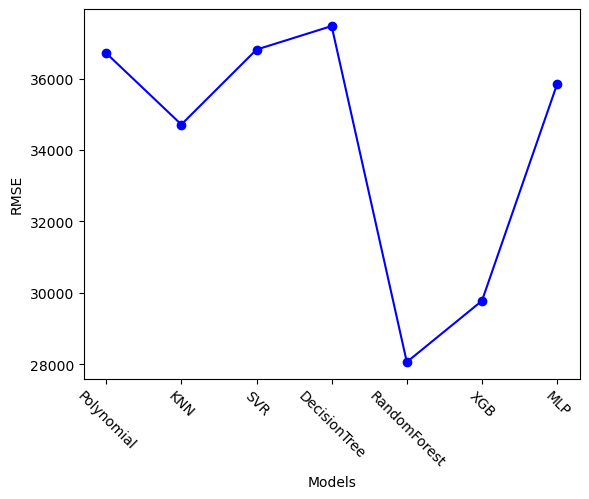

In [54]:
models = ['Polynomial', 'KNN', 'SVR','DecisionTree','RandomForest','XGB','MLP']
RMSE=[lin_rmse,knn_rmse,svr_rmse,dtr_rmse,rfr_rmse,xgbr_rmse,mlpr_rmse]

plt.plot(models, RMSE, marker='o', linestyle='-', color='b')

plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=315)

plt.show()

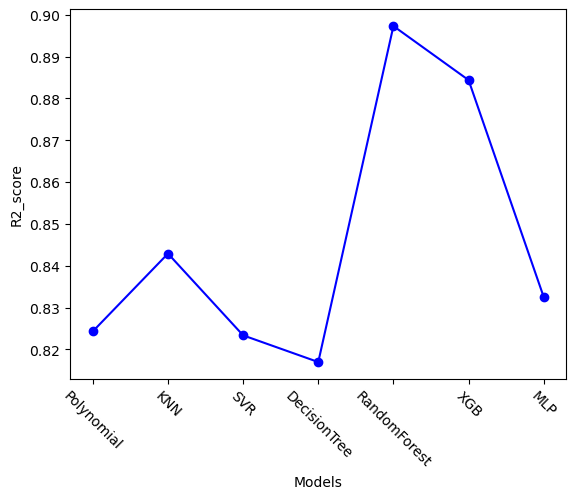

In [55]:
models = ['Polynomial', 'KNN', 'SVR','DecisionTree','RandomForest','XGB','MLP']
RMSE=[lin_r2,knn_r2,svr_r2,dtr_r2,rfr_r2,xgbr_r2,mlpr_r2]

plt.plot(models, RMSE, marker='o', linestyle='-', color='b')

plt.xlabel('Models')
plt.ylabel('R2_score')
plt.xticks(rotation=315)

plt.show()

# Discussion and Conclusion

 At the beginning of feature engineering, I did not use "Feature importances" to start feature selection. At that time, the R2 score of the selected features after model training was about 0.7, and the RMSE was between 35,000 and 45,000. After feature selection through the "Feature importances" method, the R2 score increased to the range of 0.8 to 0.9, and the RMSE also dropped to between 28,000 and 36,000.  
 From the model results, RandomForestRegressor performed the best, and the R2 score was close to 0.9, which was the highest among all models. The RMSE is about 28000 and it is also the lowest of all models.